In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/Users/pongpisit/anaconda3/envs/py3.7/bin/python
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:59:12) 
[Clang 11.0.1 ]
sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)


In [2]:
import os
import sys
import time
import numpy as np

# local import
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pynumdiff

simulate = pynumdiff.utils.simulate
evaluate = pynumdiff.utils.evaluate

%matplotlib inline

In [3]:
# simulation parameters

# noise is generated using np.random, e.g. 'normal', 'uniform', 'poisson'
# noise_type and noise_parameters should be compatible with np.random functions 

noise_type = 'normal'
noise_parameters = [0, 0.1]  # mean and std

# time step size and time series length in TIME
dt = 0.01
timeseries_length = 4

In [4]:
# simulate data

x, x_truth, dxdt_truth, _ = simulate.pi_control(dt=dt, timeseries_length=timeseries_length, 
                                                noise_type=noise_type, noise_parameters=noise_parameters)

RMS error in velocity:  6.820305856536254


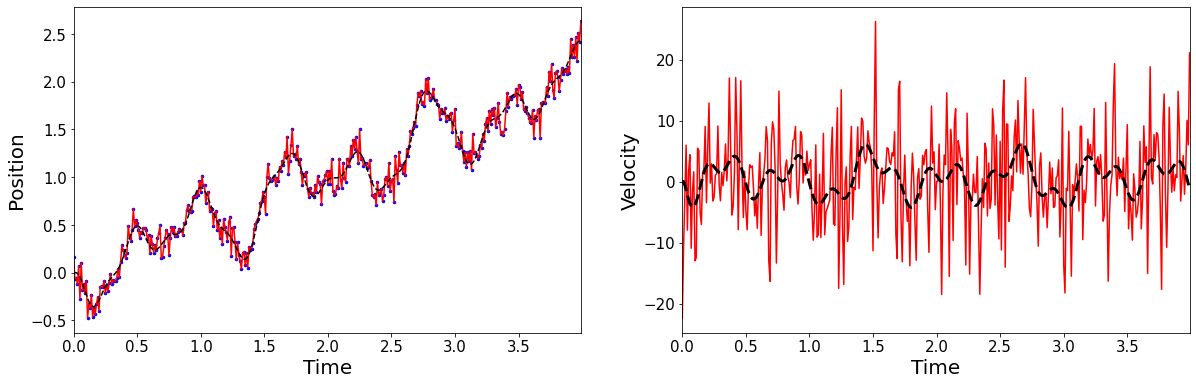

In [5]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

RMS error in velocity:  0.5753666996506336


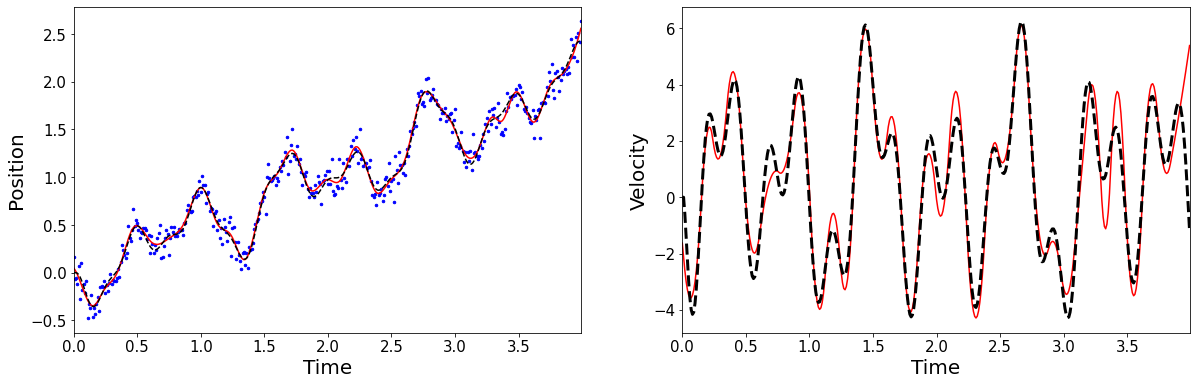

In [6]:
params = [10]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk(x, dt, params, options={'solver': "CVXOPT"})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

RMS error in velocity:  0.5030758147542645


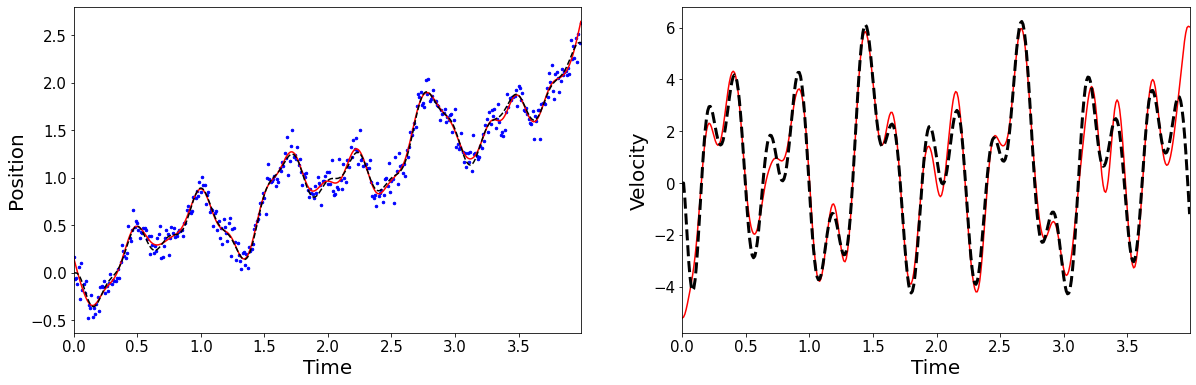

In [7]:
params = [3, 0.1]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.butterdiff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

RMS error in velocity:  0.8333274112832922


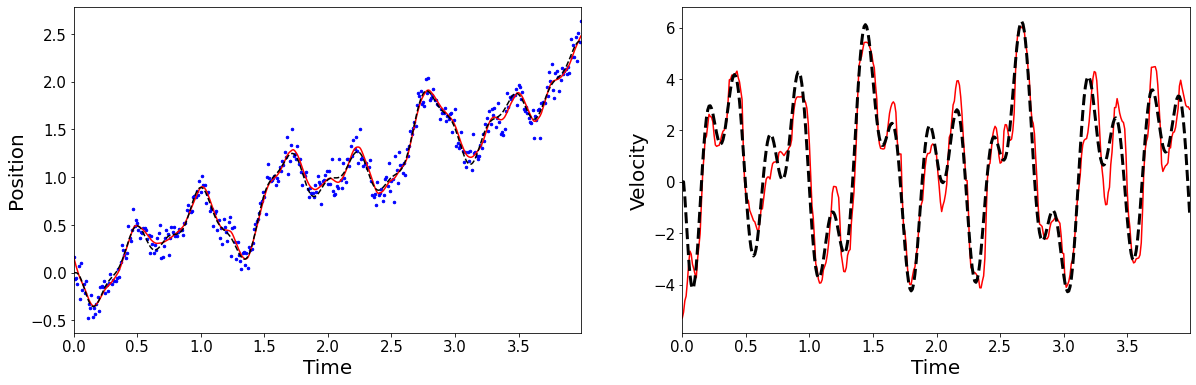

In [8]:
params = [1, 0.001]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.iterative_velocity(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

RMS error in velocity:  0.7264111752792942


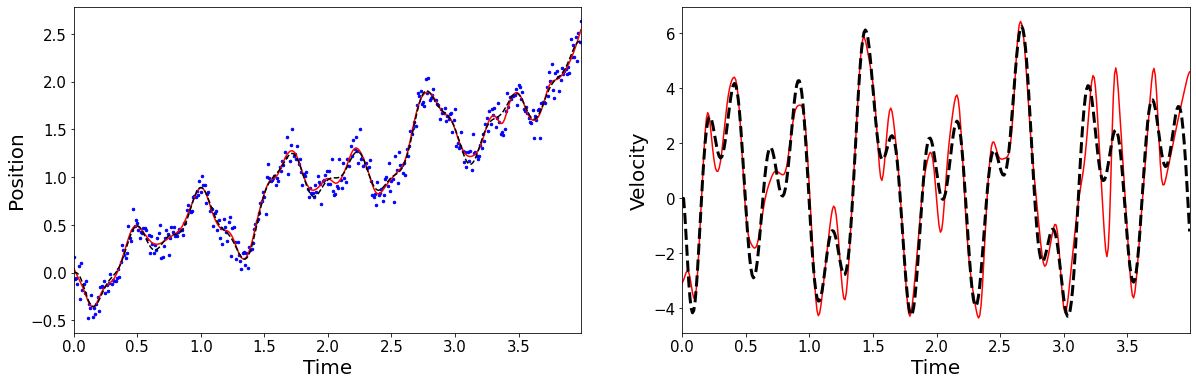

In [9]:
params = [1, 10]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.smooth_acceleration(x, dt, params, options={'solver': "CVXOPT"})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

RMS error in velocity:  0.5264689716009883


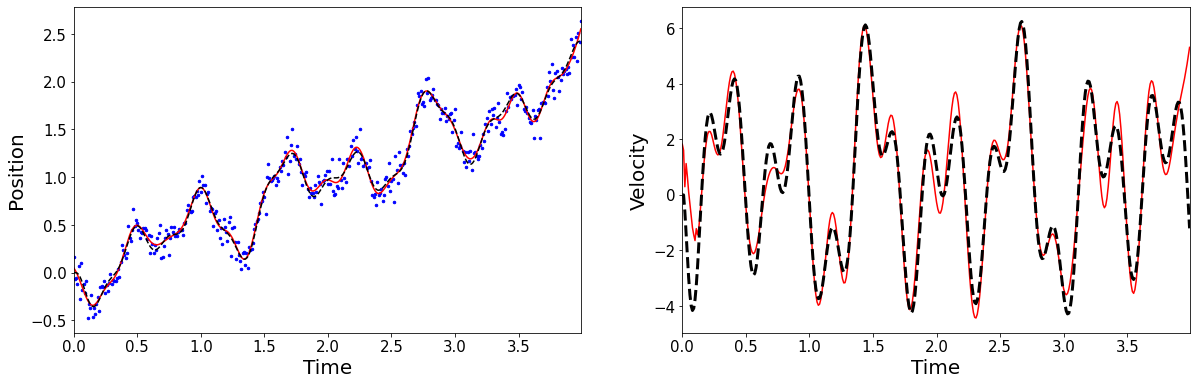

In [10]:
params = [0.01, 1e6]
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_jerk(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

RMS error in velocity:  0.6695320553291175


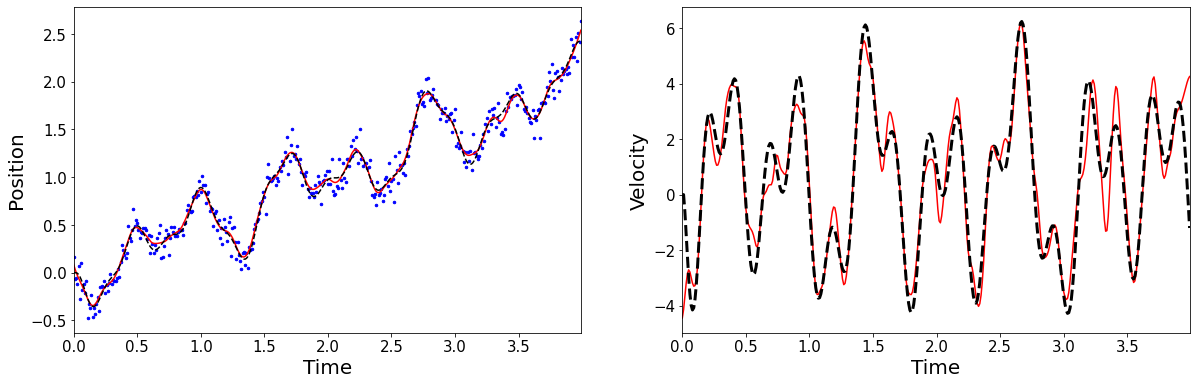

In [11]:
params = [2, 10, 10]
x_hat, dxdt_hat = pynumdiff.linear_model.savgoldiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

/Users/pongpisit/anaconda3/envs/pysr/lib/python3.10/site-packages/scipy/interpolate/_polyint.py:550: RuntimeWarning: divide by zero encountered in double_scalars
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/Users/pongpisit/anaconda3/envs/pysr/lib/python3.10/site-packages/scipy/interpolate/_polyint.py:557: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


RMS error in velocity:  0.508459766531981


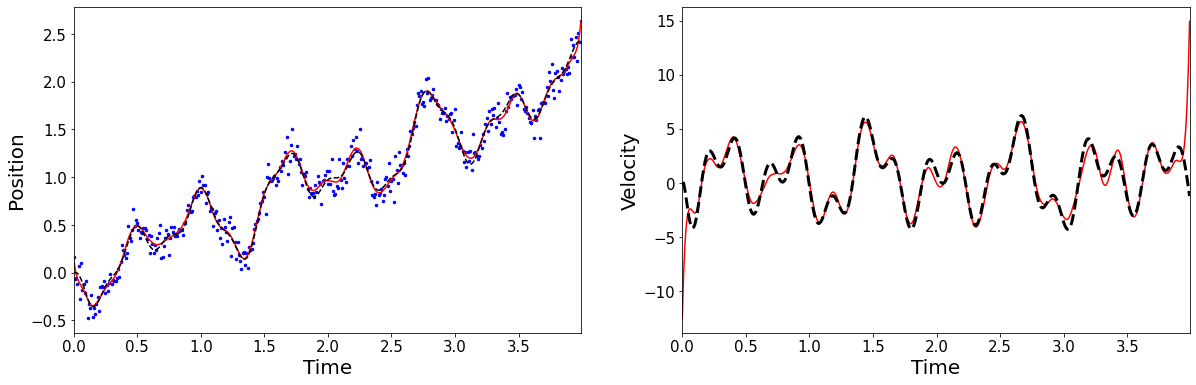

In [12]:
params = [2, 30]
x_hat, dxdt_hat = pynumdiff.linear_model.chebydiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)